In [1]:
import pandas as pd

In [2]:
col_names = ['gmat','gpa','work_Experience','admitted']

In [3]:
candidates = pd.read_csv("candidates.csv", header = None, names = col_names)

In [4]:
candidates.head(10)

,gmat,gpa,work_Experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [5]:
feature_cols = ['gmat','gpa','work_Experience']
X = candidates[feature_cols]
y = candidates.admitted

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000, penalty = 'none')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [8]:
y_pred=logreg.predict(X_test)

In [9]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 1],
       [1, 3]], dtype=int64)

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

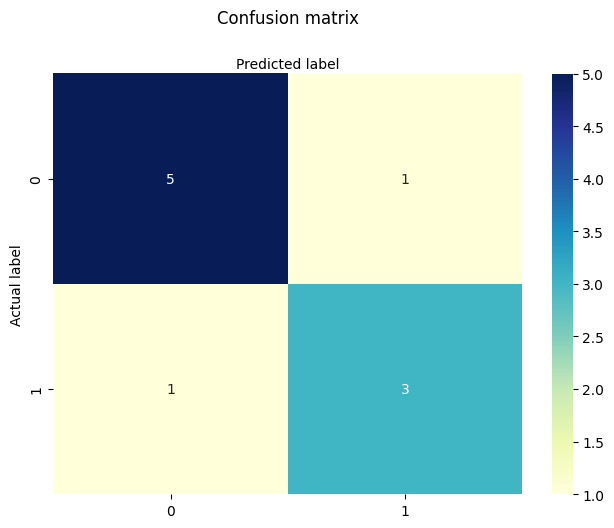

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.75


In [13]:
print(logreg.coef_)

[[  1.40599758 487.36070367  97.00885762]]


In [14]:
print(logreg.intercept_)

[-2967.25417983]


In [15]:
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                   1.000
Time:                        12:44:53   Log-Likelihood:            -1.1133e-06
converged:                      False   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 5.235e-09
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1005.4369   6.42e+04     -0.016      0.987   -1.27e+05    1.25e+05
gmat                0.7319     53.825      0.014  

c:\Users\Infinix\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
feature_cols = ['gmat','gpa','work_Experience']
new_candidates = {'gmat':[591,740,680,610,710],
               'gpa':[2.0,3.7,3.3,2.3,3.0],
               'work_Experience':[3,4,6,1,5],
               }
df_new_candidaties = pd.DataFrame(new_candidates, columns = ['gmat','gpa','work_Experience'])

In [17]:
y_pred=logreg.predict(df_new_candidaties)
print (df_new_candidaties)
print (y_pred)

   gmat  gpa  work_Experience
0   591  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 0]
